# Importing Packages


In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss, acf, grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot
from scipy import signal 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

# Importing Datasets and Transforming Data 

In [2]:
#Importing temperature data
temperature=pd.read_csv(r'C:\Users\aturk\Desktop\worldtemp.csv')
temperature.head(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland
9,1744-08-01,NaN,NaN,Åland


In [3]:
temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [4]:
temperature['dt']=pd.to_datetime(temperature['dt'])
temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             577462 non-null  datetime64[ns]
 1   AverageTemperature             544811 non-null  float64       
 2   AverageTemperatureUncertainty  545550 non-null  float64       
 3   Country                        577462 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 17.6+ MB


In [5]:
temperature.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [6]:
#Dropping years before 1960
Temp=temperature[temperature['dt']>='1960-01-01']
Temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156735 entries, 2594 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             156735 non-null  datetime64[ns]
 1   AverageTemperature             155869 non-null  float64       
 2   AverageTemperatureUncertainty  156513 non-null  float64       
 3   Country                        156735 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 6.0+ MB


In [7]:
Temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
2594,1960-01-01,-4.380,0.430,Åland
2595,1960-01-02,-5.233,0.382,Åland
2596,1960-01-03,-2.362,0.638,Åland
2597,1960-01-04,1.922,0.450,Åland
2598,1960-01-05,8.495,0.287,Åland


In [8]:
Temp['Year']=Temp.loc[:,'dt'].dt.year
Temp['Month']=Temp.loc[:,'dt'].dt.day
Temp.head()

<ipython-input-8-9e067854f5bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Temp['Year']=Temp.loc[:,'dt'].dt.year
<ipython-input-8-9e067854f5bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Temp['Month']=Temp.loc[:,'dt'].dt.day


,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Year,Month
2594,1960-01-01,-4.380,0.430,Åland,1960,1
2595,1960-01-02,-5.233,0.382,Åland,1960,2
2596,1960-01-03,-2.362,0.638,Åland,1960,3
2597,1960-01-04,1.922,0.450,Åland,1960,4
2598,1960-01-05,8.495,0.287,Åland,1960,5


In [9]:
Temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156735 entries, 2594 to 577461
Data columns (total 6 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             156735 non-null  datetime64[ns]
 1   AverageTemperature             155869 non-null  float64       
 2   AverageTemperatureUncertainty  156513 non-null  float64       
 3   Country                        156735 non-null  object        
 4   Year                           156735 non-null  int64         
 5   Month                          156735 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 8.4+ MB


In [10]:
#Creating a temperature dataset with only years
Temp_1=Temp.groupby(["Country", "Year"])['AverageTemperature'].mean().reset_index()

In [11]:
#This is the final version of temperature dataset and this is to merge with co2 emission dataset
Temp_1.head()

,Country,Year,AverageTemperature
0,Afghanistan,1960,13.985417
1,Afghanistan,1961,14.064917
2,Afghanistan,1962,13.768667
3,Afghanistan,1963,15.033417
4,Afghanistan,1964,13.084917


In [12]:
Temp_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13122 entries, 0 to 13121
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             13122 non-null  object 
 1   Year                13122 non-null  int64  
 2   AverageTemperature  13068 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 307.7+ KB


In [13]:
#importing CO2 data
co2=pd.read_csv(r'C:\Users\aturk\Desktop\co2_emissions_kt_by_country.csv')
co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13953 entries, 0 to 13952
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  13953 non-null  object 
 1   country_name  13953 non-null  object 
 2   year          13953 non-null  int64  
 3   value         13953 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 436.2+ KB


In [14]:
#Naming value column CO2 emission
co2.rename(columns={"value":'CO2 Emission'}, inplace=True)
co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13953 entries, 0 to 13952
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  13953 non-null  object 
 1   country_name  13953 non-null  object 
 2   year          13953 non-null  int64  
 3   CO2 Emission  13953 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 436.2+ KB


In [15]:
#I will merge CO2 emission and average temperature datasets together but first checking their year columns
print("CO2 emission dataset's time range is ", co2['year'].min(), "-",co2['year'].max(), ". Temperature dataset's time range is ",
  Temp_1['Year'].min(), "-",Temp_1['Year'].max())

CO2 emission dataset's time range is  1960 - 2019 . Temperature dataset's time range is  1960 - 2013


In [16]:
#Recreate datasets to be in the same time range 1960-2013
co2_1=co2[co2['year']<2014]
co2_1['year'].max()

2013

In [17]:
#Ready to Merge!
df=pd.merge(co2_1, Temp_1, how='inner', left_on=['country_name','year'], right_on=['Country','Year'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7934 entries, 0 to 7933
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country_code        7934 non-null   object 
 1   country_name        7934 non-null   object 
 2   year                7934 non-null   int64  
 3   CO2 Emission        7934 non-null   float64
 4   Country             7934 non-null   object 
 5   Year                7934 non-null   int64  
 6   AverageTemperature  7934 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 495.9+ KB


In [19]:
df.head()

,country_code,country_name,year,CO2 Emission,Country,Year,AverageTemperature
0,ABW,Aruba,1960,11092.675,Aruba,1960,28.253583
1,ABW,Aruba,1961,11576.719,Aruba,1961,28.072833
2,ABW,Aruba,1962,12713.489,Aruba,1962,28.286000
3,ABW,Aruba,1963,12178.107,Aruba,1963,28.317250
4,ABW,Aruba,1964,11840.743,Aruba,1964,28.076417


In [20]:
df[df['year']!=df['Year']]

,country_code,country_name,year,CO2 Emission,Country,Year,AverageTemperature


In [21]:
df[df['country_name']!=df['Country']]

,country_code,country_name,year,CO2 Emission,Country,Year,AverageTemperature


C:\Users\aturk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


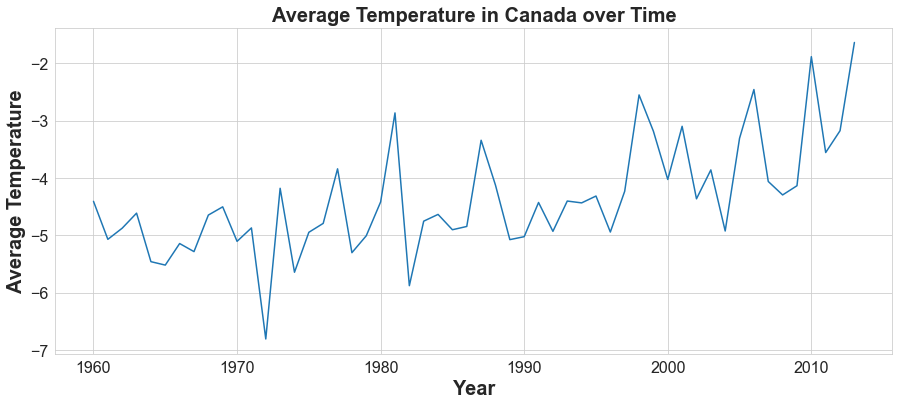

In [22]:
fig, ax=plt.subplots(figsize=(15,6))
Can=df[df['Country']=="Canada"]

sns.lineplot(Can["Year"], Can["AverageTemperature"])
ax.set_title('Average Temperature in Canada over Time', fontsize=20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Year', fontsize=20, fontdict=dict(weight='bold'))
ax.set_ylabel('Average Temperature', fontsize=20, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

In [23]:
#There is an mildly increasing trend in average temperature in canada over the years 

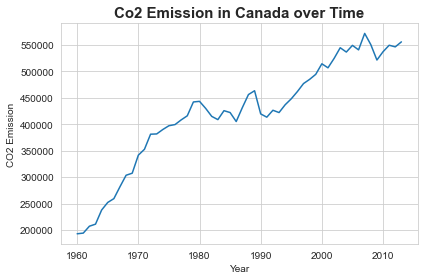

In [24]:
sns.lineplot(x=Can["Year"], y=Can["CO2 Emission"])

ax.set_xlabel('Year', fontsize=20, fontdict=dict(weight='bold'))
ax.set_ylabel('Co2 Emission', fontsize=20, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=10)
plt.tick_params(axis='x', which='major', labelsize=10)
plt.title('Co2 Emission in Canada over Time', fontsize=15, loc='center', fontdict=dict(weight='bold'))
plt.tight_layout()

In [25]:
Can_Temp=Temp[Temp['Country']=='Canada']
Can_Temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Year,Month
99551,1960-01-01,-22.140,0.250,Canada,1960,1
99552,1960-01-02,-18.113,0.242,Canada,1960,2
99553,1960-01-03,-18.117,0.212,Canada,1960,3
99554,1960-01-04,-6.975,0.241,Canada,1960,4
99555,1960-01-05,3.733,0.276,Canada,1960,5


In [26]:
Can_Temp_Year=Can_Temp[Can_Temp['Year']%5==0]
Can_Temp_Year.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Year,Month
99551,1960-01-01,-22.140,0.250,Canada,1960,1
99552,1960-01-02,-18.113,0.242,Canada,1960,2
99553,1960-01-03,-18.117,0.212,Canada,1960,3
99554,1960-01-04,-6.975,0.241,Canada,1960,4
99555,1960-01-05,3.733,0.276,Canada,1960,5


Text(0, 0.5, 'Average Temperature in Canada')

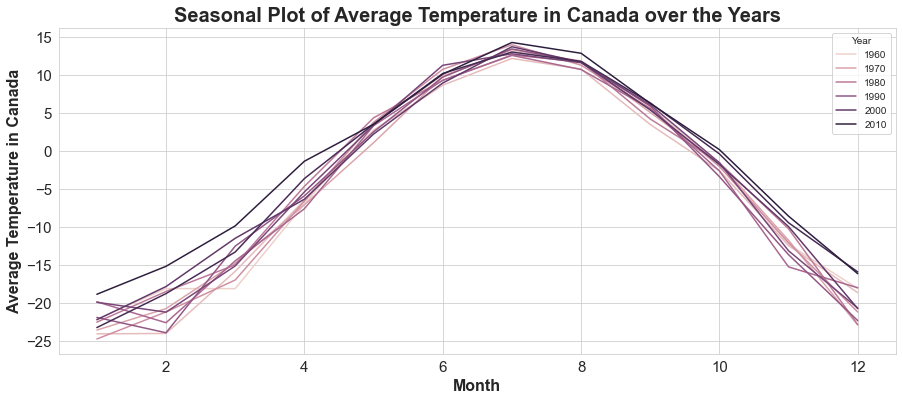

In [27]:
fig, ax=plt.subplots(figsize=(15,6))

#palette=sns.color_palette(palette='bright')
sns.lineplot(x=Can_Temp_Year['Month'], y=Can_Temp_Year['AverageTemperature'], hue=Can_Temp_Year['Year'])
ax.set_title('Seasonal Plot of Average Temperature in Canada over the Years', fontsize=20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel("Month", fontsize=16, fontdict=dict(weight='bold'))
ax.set_ylabel('Average Temperature in Canada', fontsize=16, fontdict=dict(weight='bold'))



C:\Users\aturk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Average Temperature in Canada Monthly over the Years')

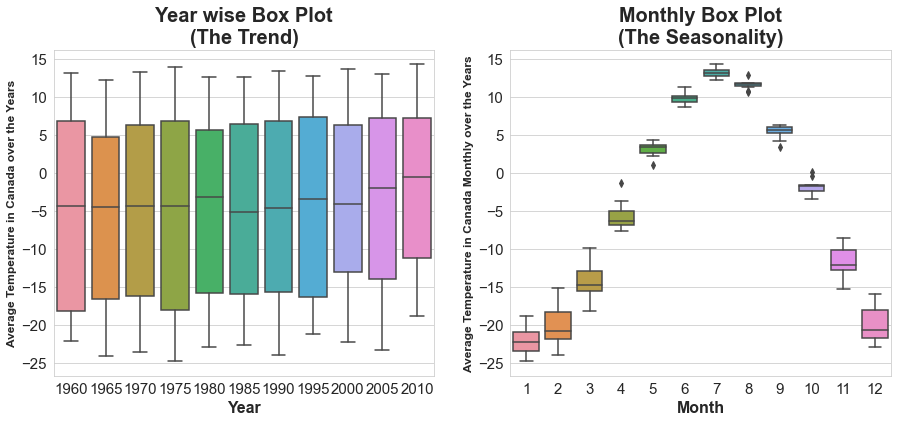

In [28]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,6))

sns.boxplot(x=Can_Temp_Year['Year'],y=Can_Temp_Year['AverageTemperature'], ax=ax[0])
ax[0].set_title('Year wise Box Plot\n(The Trend)', fontsize=20, loc='center', fontdict=dict(weight='bold'))
ax[0].set_xlabel('Year', fontsize=16, fontdict=dict(weight='bold'))
ax[0].set_ylabel('Average Temperature in Canada over the Years', fontsize=12, fontdict=dict(weight='bold'))

sns.boxplot(Can_Temp_Year['Month'],Can_Temp_Year['AverageTemperature'], ax=ax[1])
ax[1].set_title('Monthly Box Plot\n(The Seasonality)', fontsize=20, loc='center', fontdict=dict(weight='bold'))
ax[1].set_xlabel('Month', fontsize=16, fontdict=dict(weight='bold'))
ax[1].set_ylabel('Average Temperature in Canada Monthly over the Years', fontsize=12, fontdict=dict(weight='bold'))


In [29]:
#We can clearly observe that average temperature and lower limit over the years is trending upwards
#It is also very interesting to see that between 1980 and 1990 average temperature is dropping as co2 emission drops in these years. 

In [30]:
Can_Temp['Day']=1
Can_Temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645 entries, 99551 to 100195
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             645 non-null    datetime64[ns]
 1   AverageTemperature             645 non-null    float64       
 2   AverageTemperatureUncertainty  645 non-null    float64       
 3   Country                        645 non-null    object        
 4   Year                           645 non-null    int64         
 5   Month                          645 non-null    int64         
 6   Day                            645 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 40.3+ KB


<ipython-input-30-3a5b4d67eb91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Can_Temp['Day']=1


In [31]:
Can_Temp["Correct Date"]=pd.to_datetime(dict(year=Can_Temp['Year'], month=Can_Temp['Month'], day=Can_Temp['Day']))
Can_Temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645 entries, 99551 to 100195
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             645 non-null    datetime64[ns]
 1   AverageTemperature             645 non-null    float64       
 2   AverageTemperatureUncertainty  645 non-null    float64       
 3   Country                        645 non-null    object        
 4   Year                           645 non-null    int64         
 5   Month                          645 non-null    int64         
 6   Day                            645 non-null    int64         
 7   Correct Date                   645 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(3), object(1)
memory usage: 45.4+ KB


<ipython-input-31-ead9bf6e418b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Can_Temp["Correct Date"]=pd.to_datetime(dict(year=Can_Temp['Year'], month=Can_Temp['Month'], day=Can_Temp['Day']))


In [32]:
Can_Temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Year,Month,Day,Correct Date
99551,1960-01-01,-22.140,0.250,Canada,1960,1,1,1960-01-01
99552,1960-01-02,-18.113,0.242,Canada,1960,2,1,1960-02-01
99553,1960-01-03,-18.117,0.212,Canada,1960,3,1,1960-03-01
99554,1960-01-04,-6.975,0.241,Canada,1960,4,1,1960-04-01
99555,1960-01-05,3.733,0.276,Canada,1960,5,1,1960-05-01


In [33]:
Can_Temp['Correct Date'].max()

Timestamp('2013-09-01 00:00:00')

In [34]:
Can_Temp_Last10=Can_Temp[Can_Temp['Correct Date']>'2003-09-01 00:00:00']
Can_Temp_Last10.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Year,Month,Day,Correct Date
100076,2003-01-10,-0.087,0.315,Canada,2003,10,1,2003-10-01
100077,2003-01-11,-10.920,0.213,Canada,2003,11,1,2003-11-01
100078,2003-01-12,-16.163,0.257,Canada,2003,12,1,2003-12-01
100079,2004-01-01,-24.732,0.273,Canada,2004,1,1,2004-01-01
100080,2004-01-02,-18.592,0.175,Canada,2004,2,1,2004-02-01


In [35]:
#Seasonal Subseries of last 10 years
y=Can_Temp_Last10[['Correct Date','AverageTemperature']]

y=y.set_index('Correct Date')

In [36]:
y.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 2003-10-01 to 2013-09-01
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AverageTemperature  120 non-null    float64
dtypes: float64(1)
memory usage: 1.9 KB


In [37]:
y.head()

,AverageTemperature
Correct Date,
2003-10-01,-0.087
2003-11-01,-10.920
2003-12-01,-16.163
2004-01-01,-24.732
2004-02-01,-18.592


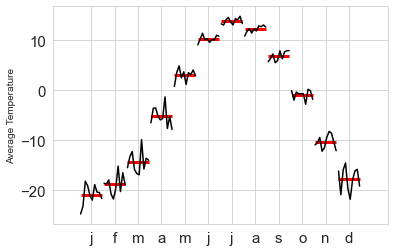

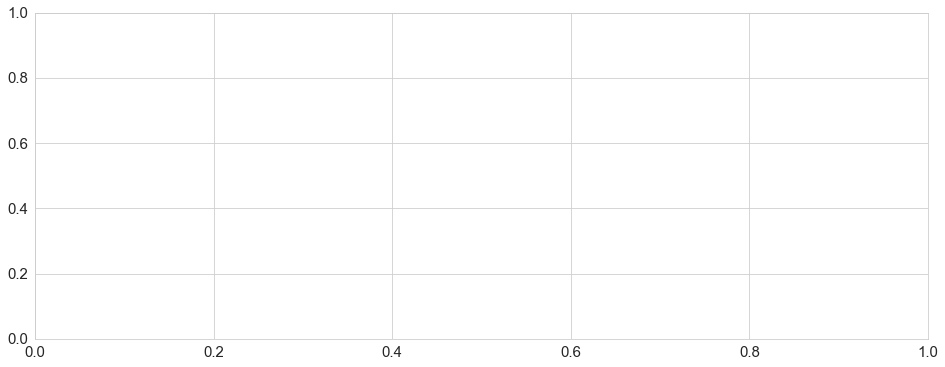

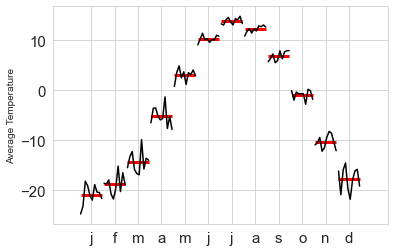

In [38]:
fig, ax = plt.subplots(figsize=(16,6))
month_plot(x=y['AverageTemperature'], ylabel='Average Temperature')

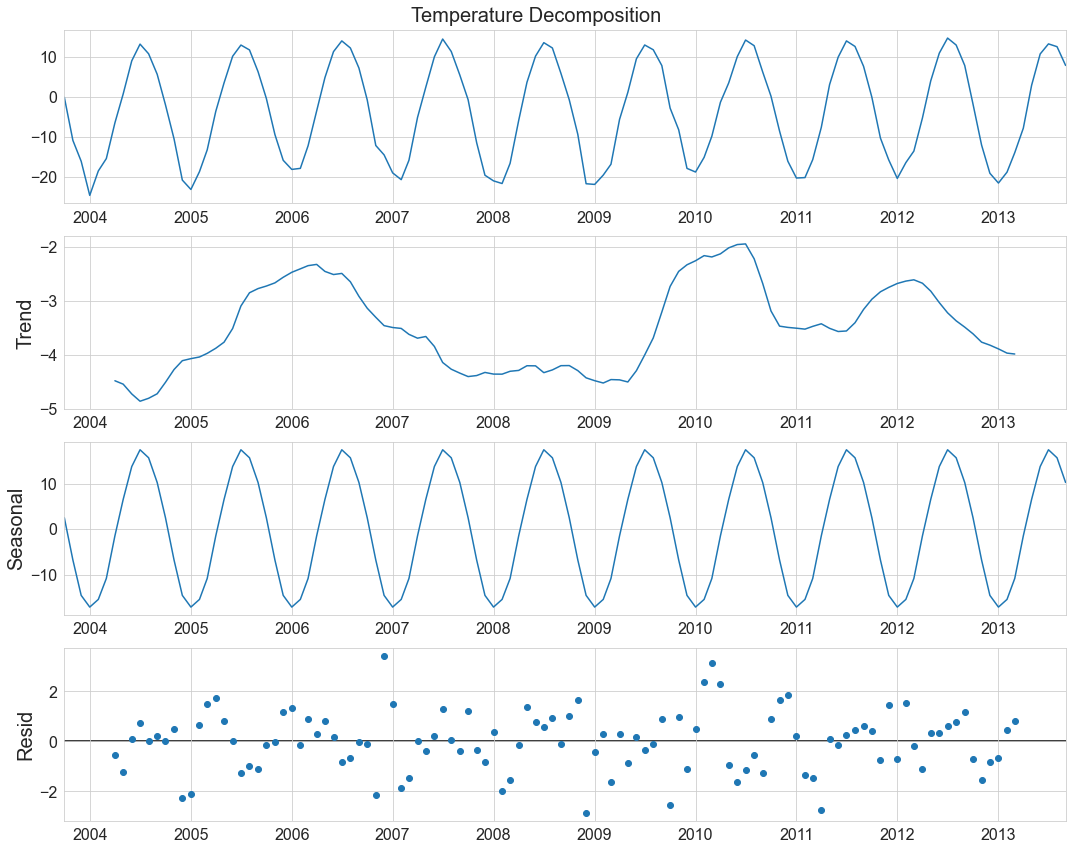

In [39]:
#Decomposition to Seasonal & Trend & Remainder Components
from pylab import rcParams
rcParams['figure.figsize']=15,12
rcParams['axes.labelsize']=20
rcParams['ytick.labelsize']=16
rcParams['xtick.labelsize']=16
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
decomp = decomposition.plot()
decomp.suptitle('Temperature Decomposition', fontsize=20) 
plt.tight_layout()